# Table of Contents:
1. [Introduction](#section-one)

2. [Data preparation](#section-two)

3. [Data Visualization](#section-three)

4. [Wrath of COVID-19](#section-four)

5. [Stationarity conversion](#section-five)

6. [Conclusion](#section-six)

<a id="section-one"></a>
# Introduction
Time plays a very important role when it comes to buiness.Each second is money every national and global economies depends on time. Time series analysis have become a widely used tool in the field of analytics inorder to understand a variable which depends on time. 

## What is time series analysis?
<img src="https://dataanalyticsedge.com/wp-content/uploads/2017/11/time-series-analysis.png">
Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types:

* **Time series data:** A set of observations on the values that a variable takes at different times.

* **Cross-sectional** data: Data of one or more variables, collected at the same point in time.

* **Pooled data:** A combination of time series data and cross-sectional data.

Source:[Statistics Solution](https://www.statisticssolutions.com/time-series-analysis/) 

## Reliance Industries

<img src="https://akm-img-a-in.tosshub.com/sites/btmt/images/stories/reliance_industries_logo_660x450_090720075629.jpg">

Reliance Industries Limited (RIL) is an Indian multinational conglomerate company headquartered in Mumbai, Maharashtra, India. Reliance owns businesses across India engaged in energy, petrochemicals, textiles, natural resources, retail, and telecommunications. Reliance is one of the most profitable companies in India, the largest publicly traded company in India by market capitalization, and the largest company in India as measured by revenue after recently surpassing the government-controlled Indian Oil Corporation.[5] On 22 June 2020, Reliance Industries became the first Indian company to exceed US$150 billion in market capitalization after its market capitalization hit ₹11,43,667 crore on the BSE.

The company is ranked 106th on the Fortune Global 500 list of the world's biggest corporations as of 2019. It is ranked 8th among the Top 250 Global Energy Companies by Platts as of 2016. Reliance continues to be India's largest exporter, accounting for 8% of India's total merchandise exports with a value of ₹1,47,755 crore and access to markets in 108 countries. Reliance is responsible for almost 5% of the government of India's total revenues from customs and excise duty. It is also the highest income tax payer in the private sector in India.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Reliance_Industries)

## Acknowledgements
1. For clearly explaining the AUTO ARIMA model - [Vopani](https://www.kaggle.com/rohanrao/a-modern-time-series-tutorial)
2. For the wonderful visualization guidelines- [Parul Pandey](https://www.kaggle.com/parulpandey/nifty-data-eda)
3. Prophet documentation - [Facebook](http://facebook.github.io/prophet/docs/quick_start.html)

## Project summary
The project revolves around analysing the the closing price and Volume-weighted average price of Reliance's stock changes in time. It starts with preparing the data for visualizations and goes on with an extensive exploratory data analysis which also includes the impact of Reliance stocks due to COVID-19 and followed by time series model building and using the new tool Prophet for time series forecasting released by Facebook

## Objectives of the project
1. Data Preparation
2. Data Visualization
3. Building a time series model


## Dataset
The data is the price history and trading volumes of the fifty stocks in the index [NIFTY 50 from NSE](https://www.nseindia.com/) (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 31st July, 2020.

### Import libraries

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 405 kB/s 
     |████████████████████████████████| 2.1 MB 3.5 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
sns.set_style("whitegrid")
%matplotlib inline
import altair as alt 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Timeseries model libraries
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from fbprophet import Prophet

#Performance metric libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Import dataset
First let's welcome our dataset

In [3]:
reliance_raw=pd.read_csv("../input/nifty50-stock-market-data/RELIANCE.csv")

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(reliance_raw.shape))
print (reliance_raw.info())

The shape of the  data is (row, column):(5097, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5097 non-null   object 
 1   Symbol              5097 non-null   object 
 2   Series              5097 non-null   object 
 3   Prev Close          5097 non-null   float64
 4   Open                5097 non-null   float64
 5   High                5097 non-null   float64
 6   Low                 5097 non-null   float64
 7   Last                5097 non-null   float64
 8   Close               5097 non-null   float64
 9   VWAP                5097 non-null   float64
 10  Volume              5097 non-null   int64  
 11  Turnover            5097 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  4583 non-null   float64
 14  %Deliverble         4583 non-null   float64
dtypes: f

In [4]:
reliance_raw.head()

Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
1  2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2  2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
3  2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
4  2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  251.70  249.37   4456424  1.111319e+14     NaN                 NaN   
1  271.85  263.52   9487878  2.500222e+14     NaN                 NaN   
2  282.50  274.79  26833684  7.373697e+14     NaN                 NaN   
3  294.35  295.45  15682286  4.633254e+14     NaN                 NaN   
4  314.55  308.91  19870977  6.138388e+14     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

## Dataset Details


Description of columns in the file:

* Date - Date of trade
* symbol - Name of the company (Reliance)
* Series - We have only one series(EQ): It stands for Equity. In this series intraday trading is possible in addition to delivery
* Prev Close - Refers to the prior day's final price of a security when the market officially closes for the day.
* Open - The open is the starting period of trading on a securities exchange or organized over-the-counter market.
* High -  Highest price at which a stock traded during the course of the trading day.
* Low - Lowest price at which a stock traded during the course of the trading day.
* Last - The last price of a stock is just one price to consider when buying or selling shares. The last price is simply the most recent one
* Close - The close is a reference to the end of a trading session in the financial markets when the markets close for the day. 
* VWAP(Volume-weighted average price)- It is the ratio of the value traded to total volume traded over a particular time horizon. It is a measure of the average price at which a stock is traded over the trading horizon
* Volume - It is the amount of a security that was traded during a given period of time
* Turnover -It is a measure of sellers versus buyers of a particular stock. It is calculated by dividing the daily volume of a stock by the "float" of a stock, which is the number of shares available for sale by the general trading public.
* Trades- The number of shares being traded on a given day is called trading volumes
* Deliverabe Volume -  quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares 
* %Deliverable - shares which are actually transferred from one person's to another's demat account.

In [5]:
reliance_raw.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [6]:
#Checking out the statistical measures
reliance_raw.describe()

Prev Close         Open         High          Low         Last  \
count  5097.000000  5097.000000  5097.000000  5097.000000  5097.000000   
mean    968.800824   970.235894   984.038817   955.105081   968.906092   
std     541.854956   543.235347   552.724884   531.387342   541.689022   
min     203.200000   205.500000   219.500000   197.150000   203.300000   
25%     552.750000   555.000000   564.300000   545.600000   552.650000   
50%     921.000000   922.100000   932.500000   911.300000   920.450000   
75%    1151.400000  1151.250000  1174.700000  1128.000000  1152.000000   
max    3220.850000  3298.000000  3298.000000  3141.300000  3223.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  5097.000000  5097.000000  5.097000e+03  5.097000e+03  2.247000e+03   
mean    969.089435   969.631030  5.186155e+06  5.047001e+14  1.243892e+05   
std     541.854759   541.885341  4.267713e+06  5.510347e+14  9.884481e+04   
min     203.200000   212.290000  5.282000e+04  4.295543e+12  2.991000e+03   
25%     552.950000   552.640000  2.784741e+06  2.145437e+14  7.000400e+04   
50%     921.000000   922.390000  4.096597e+06  3.529453e+14  9.606200e+04   
75%    1152.300000  1148.050000  6.245328e+06  6.133209e+14  1.439110e+05   
max    3220.850000  3197.750000  6.523089e+07  8.835030e+15  1.194059e+06   

       Deliverable Volume  %Deliverble  
count        4.583000e+03  4583.000000  
mean         2.179294e+06     0.440426  
std          1.796170e+06     0.144242  
min          2.909700e+04     0.076300  
25%          1.164656e+06     0.329200  
50%          1.751404e+06     0.456400  
75%          2.604270e+06     0.548000  
max          3.495888e+07     0.978300

**Insights:**
* There are many outliers in our dataset as we can see the max is 3 times the 75th percentile
* The standard deviation and other statistical measurements is more or less equal among all the features


<a id="section-two"></a>
# Data preparation
Inorder for our machine learning algorithm to perform well, we need to cleanse our data. In our case, we don't have much garbage to clean except few null values. Also let's also extract few more features from the time to perform indepth EDA

In [7]:
#Creating a copy
reliance_analysis=reliance_raw.copy()

#Coverting date column to datetime data type
reliance_analysis['Date'] = reliance_analysis['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
reliance_analysis["Month"] = reliance_analysis.Date.dt.month
reliance_analysis["Week"] = reliance_analysis.Date.dt.week
reliance_analysis["Day"] = reliance_analysis.Date.dt.day
reliance_analysis["Day of week"] = reliance_analysis.Date.dt.dayofweek


#Setting date column as index
reliance_analysis.set_index("Date", drop=False, inplace=True)
reliance_analysis.iloc[:,15:19].head()

Month  Week  Day  Day of week
Date                                     
2000-01-03      1     1    3            0
2000-01-04      1     1    4            1
2000-01-05      1     1    5            2
2000-01-06      1     1    6            3
2000-01-07      1     1    7            4

As you notice we have few new features assembled due to extraction. Let's gid rid of the null values by imputing it with mean value.

In [8]:
#Imputing null values with mean 
reliance_analysis.fillna(reliance_analysis.mean(),inplace=True)

#Checking for null values
reliance_analysis.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Month                 0
Week                  0
Day                   0
Day of week           0
dtype: int64

<a id="section-three"></a>
# Data Visualization
Exploratory data analysis is a core part of time series analysis. In this phase, we will witness a lot of line graphs which can help us understand the trend, seasonality and many other concepts from time series analysis

## Distribution of stock measures
Let's witness the histogram distribution of the stock measures such as open,close,high,low and as well as VWAP

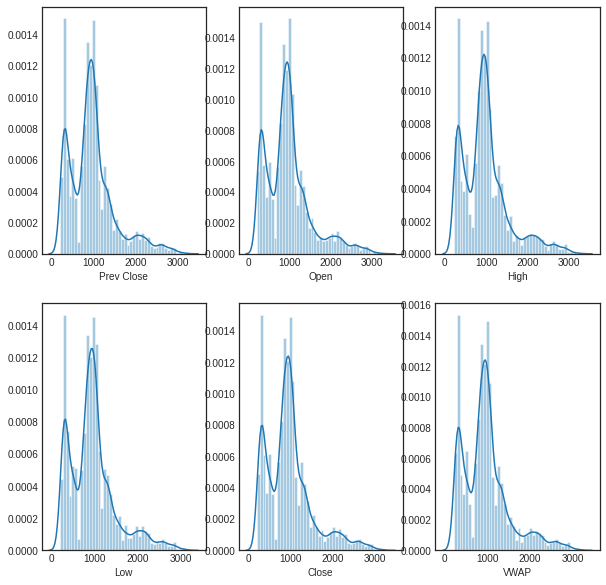

In [9]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Subplots of distplot
plt.subplot(231)
sns.distplot(reliance_analysis['Prev Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(reliance_analysis['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(reliance_analysis['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(reliance_analysis['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(reliance_analysis['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(reliance_analysis['VWAP'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Insights:**
* All the meaures exhibit equal distribution property
* All the distributions are right skewed

## Univariate Analysis
Let's see the trend of single factor over time 

## VWAP over time 
Now let's see the Volume-weighted average price over the time. Please feel free to use the range slider to analyzeover time

In [10]:
fig = px.line(reliance_analysis, x='Date', y='VWAP',title='VWAP over Years(Use Rangeslider to slide over time)')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

**Insights:**
* There has been a gradual increase in the trend of VWAP over years
* There were two spikes in Jan 2008 and May-Oct 2009 

 Mukesh Ambani-controlled company are trading at near their all-time high levels of about Rs 1,625, a price that was last seen over nine-and-a-half years ago in January 2008. Reliance Industries shares ended at Rs 1,621.15 on Wednesday. By contrast, it saw an intra-day high of Rs 1,649 and previous closing high of Rs 1,610 in January 2008. [News here](https://www.financialexpress.com/market/reliance-industries-ril-share-price-all-time-high-10-year-return-zero-jul-2017/780392/) 

## Univariate analysis of Open,Close,High and Low
Let's see open,close, high and low measures over years

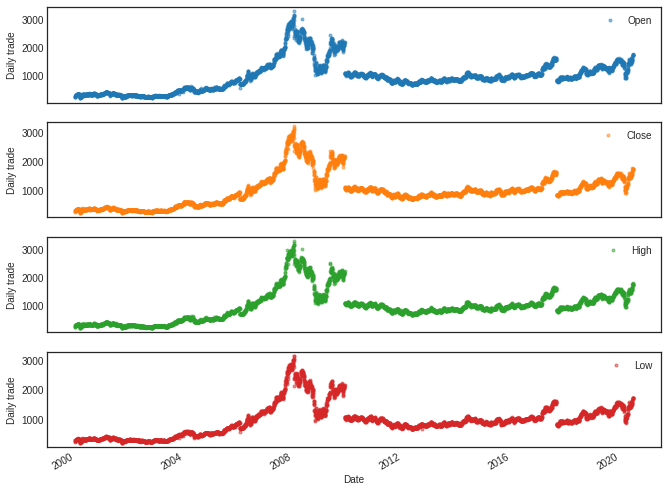

In [11]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = reliance_analysis[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

**Insights:**
* As we know, all these parameters follow the same pattern without much deviation
* Theres a break between 2008-2012 and 2016-2020. It signifies a sudden dip in the market for Reliance.

## Univariate analysis of Volume of share over the years
Let's see the volume of shares that have been traded over NIFTY 50.

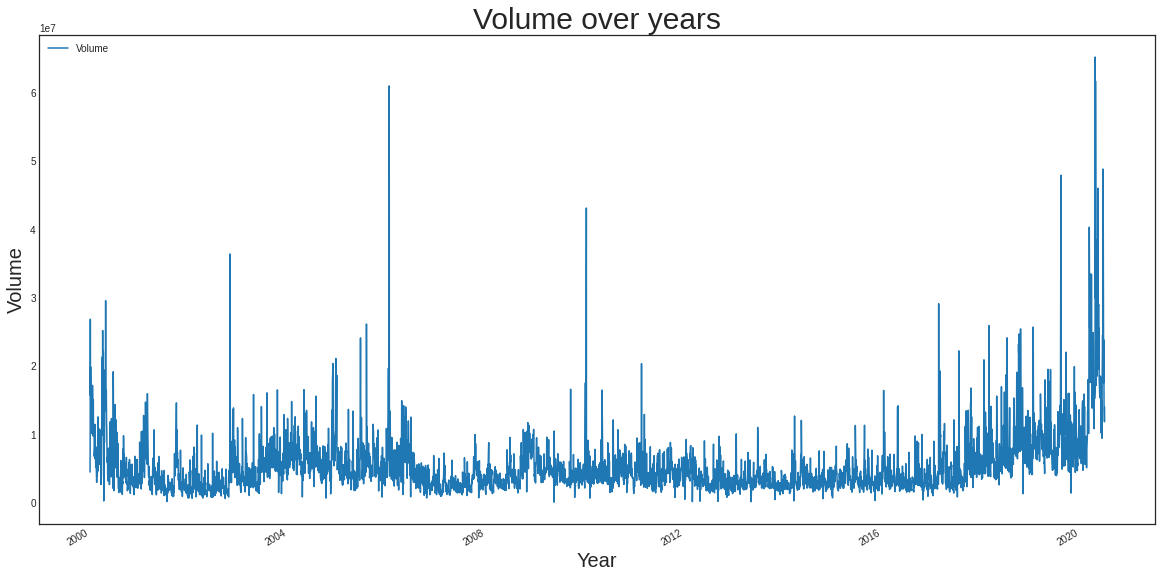

In [12]:
ax=reliance_analysis[['Volume']].plot(stacked=True)
ax.set_title('Volume over years',fontsize= 30)
ax.set_xlabel('Year',fontsize = 20)
ax.set_ylabel('Volume',fontsize = 20)
plt.show()

**Insights:**
* There have been huge number of shared in 2020. This could be due to the reign of Jio and Investment by top tech gaints like Facebook and Google.
* The thin phase lie between 2008-2016, in this phase there hasn't been  big volumes traded during these years.
* Reliance have a strong foot in India and has got the trust of the citizens of India that is a valuable company.

## Bivariate analysis
Let's compare two factors over time

## Open Vs Close over time
Our first bivariate analysis involves open and close parameters 

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=reliance_analysis['Date'],
         y=reliance_analysis['Open'],
         name='Open',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=reliance_analysis['Date'],
         y=reliance_analysis['Close'],
         name='Close',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='Open Vs Close',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()


**Insights:**
* If you can notice(use rangeslider to zoom in) we can clearly see most of the time the open is higher than close. 
* But the difference is very subtle. If we take moving average, we might not even notice the difference.
* There's one place where you can notice a big difference is on May 2,2008 where the opening starts with 3026 and closes at 2674.5 

## High vs Low
Now, lets look at the high and low parameters over the years

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=reliance_analysis['Date'],
         y=reliance_analysis['High'],
         name='High',
    line = dict(color='green', width=4, dash='dot'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=reliance_analysis['Date'],
         y=reliance_analysis['Low'],
         name='Low',
    line=dict(color='orange', width=4, dash='dot'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='High Vs Low',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()


**Insights:**
* High vs Low follows the same path as Open vs Low, where High is a little higher than Low price of the day.
* If you see at November 25 and 26 2009, The lowest price hit on 25th 2169 and on 26th the high price recorded was 1111, which shows the huge dip

## Moving average analysis
Moving average is a smoothing technique applied to time series to remove the fine-grained variation between time steps.The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

In our project we consider the moving mean and standard deviation for 3,7 and 30 days. Thanks to Vopani for this wonderful piece of code.

In [15]:
#Making a copy
reliance_lag=reliance_analysis.copy()
#Reset index
reliance_lag.reset_index(drop=True, inplace=True)
#Creating lag features
lag_features = ["High", "Low", "Volume", "VWAP"]

# Taking the number of days in window
window1 = 3
window2 = 7
window3 = 30

#Rolling mean
df_rolled_3d = reliance_lag[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = reliance_lag[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = reliance_lag[lag_features].rolling(window=window3, min_periods=0)

#Moving average
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

#Standard deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

# Adding the features to the dataframe
for feature in lag_features:
    reliance_lag[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    reliance_lag[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    reliance_lag[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    reliance_lag[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    reliance_lag[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    reliance_lag[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

reliance_lag.fillna(reliance_lag.mean(), inplace=True)

#Setting Date as index
reliance_lag.set_index("Date", drop=False, inplace=True)
reliance_lag.head()

Date    Symbol Series  Prev Close    Open    High     Low  \
Date                                                                         
2000-01-03 2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50   
2000-01-04 2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30   
2000-01-05 2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65   
2000-01-06 2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00   
2000-01-07 2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00   

              Last   Close    VWAP  ...  Volume_mean_lag30  Volume_std_lag3  \
Date                                ...                                       
2000-01-03  251.70  251.70  249.37  ...          5166979.5     1.553956e+06   
2000-01-04  271.85  271.85  263.52  ...          4456424.0     1.553956e+06   
2000-01-05  286.75  282.50  274.79  ...          6972151.0     3.557775e+06   
2000-01-06  293.50  294.35  295.45  ...         13592662.0     1.173978e+07   
2000-01-07  314.50  314.55  308.91  ...         14115068.0     8.790159e+06   

            Volume_std_lag7  Volume_std_lag30  VWAP_mean_lag3  VWAP_mean_lag7  \
Date                                                                            
2000-01-03       1898096.00        2375923.50      969.193665      968.618530   
2000-01-04       1898096.00        2375923.50      249.369995      249.369995   
2000-01-05       3557775.25        3557775.25      256.445007      256.445007   
2000-01-06      11739778.00       11739778.00      262.559998      262.559998   
2000-01-07       9642262.00        9642262.00      277.920013      270.782501   

            VWAP_mean_lag30  VWAP_std_lag3  VWAP_std_lag7  VWAP_std_lag30  
Date                                                                       
2000-01-03       965.651184      12.697587      20.819576       45.722233  
2000-01-04       249.369995      12.697587      20.819576       45.722233  
2000-01-05       256.445007      10.005561      10.005561       10.005561  
2000-01-06       262.559998      12.737163      12.737163       12.737163  
2000-01-07       270.782501      16.193483      19.457516       19.457516  

[5 rows x 43 columns]

We have created the moving average and standard deviation for the respective days across High, Low, Volume, VWAP

## High vs Low with mean and standard deviation lag - 30 days

In this notebook, I'm considering only 30 days for comparison to get a lower noise. You can copy and edit this code to change the window according to your wish. Here we compare the High vs Low with mean and standard deviation.

In [16]:
#Printing the high curve
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['High'],
         name='High',
    line=dict(color='green'),
    opacity=0.8))

#Printing the low curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Low'],
         name='Low',
    line=dict(color='orange'),
    opacity=0.8))

#Printing the high lag mean-30 days curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['High_mean_lag30'],
         name='High_mean_lag30',
    line=dict(color='red'),
    opacity=0.8))

#Printing the high lag standard deviation-30 days curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['High_std_lag30'],
         name='High_std_lag30',
    line=dict(color='royalblue'),
    opacity=0.8))

#Printing the low lag mean-30 days curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Low_mean_lag30'],
         name='Low_mean_lag30',
    line=dict(color='yellow'),
    opacity=0.8))

#Printing the low lag standard deviation-30 days curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Low_std_lag30'],
         name='Low_std_lag30',
    line=dict(color='pink'),
    opacity=0.8))

#Updating the time axis
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
#Update the title   
fig.update_layout(title_text='High Vs Low with mean lag and standard deviation lag',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

You can click on the legends in the plotly graph to see individual curves
**Insights:**
* Considering the standard deviation,there's a high deviation whenever there is a drop in the price of stock.
* With the help of standard deviation we can understand where the company faced loss.
* Even though the lag curve isn't much less with noise, we have a clear idea on how the high and low price move over time 

In [17]:
#Printing the Volume curve
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Volume'],
         name='Volume',
    line=dict(color='green'),
    opacity=0.8))

#Printing the Volume_mean_lag-30 days curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Volume_mean_lag30'],
         name='Volume_mean_lag30',
    line=dict(color='yellow'),
    opacity=0.8))
#Printing the Volume_std_lag30 curve
fig.add_trace(go.Scatter(
         x=reliance_lag['Date'],
         y=reliance_lag['Volume_std_lag30'],
         name='Volume_std_lag30',
    line=dict(color='blue'),
    opacity=0.8))

#Updating time axis
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
#Updating layout 
fig.update_layout(title_text='Volume with mean lag and standard deviation lag',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()


**Insights:**
* Here we have a neat representation of the moving average and standard deviation graph
* There's a lot of deviation when the volume value is reaching 2020 and corresponding mean is high compared to standard deviation

<a id="section-four"></a>
# Wrath of COVID-19 
<img src="https://specials-images.forbesimg.com/imageserve/5eaa7ba552ac2e00060e010b/960x0.jpg?fit=scale">
In this phase we will see how COVID lockdown has affected the company's performance
## Volume during Phase 1 Lockdown(25 March – 14 April) and Phase 2 Lockdown (15 April – 3 May)

In [18]:
#Setting the range of base plot
fig = px.line(reliance_analysis, x='Date', y='Volume',title='Volume during Phase 1 Lockdown(25 March – 14 April) and Phase 2 Lockdown (15 April – 3 May)', range_x=['2020-01-01','2020-06-30'])

# Adding the shape in the dates
fig.update_layout(
    shapes=[
        # First phase Lockdown
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-03-23",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        # Second phase Lockdown
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Green",
            opacity=0.5,
            layer="below",
            line_width=0,
        )],
    annotations=[dict(x='2020-04-15', y=0.99, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Phase 1 Lockdown'),
                 dict(x='2020-05-12', y=0.99, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Phase 2 Lockdown')])

fig.show()

**Insights:**
* We can see the gradual fall in the first lockdown due to sudden announcement and WFH was tedious to adopt in that situation and every company like Reliance faced a short dip
* But Reliance has pushed beyond its boundaries in the phase 2 lockdown as we can see the company reaches the top peak of 2020 in the phase 2 lockdown by coming up with vairous strategies and plan by WFH, Let's checkout what Reliance did in 2020 to reach the peak

## Performance after lockdown-VWAP
<img src="https://www.thestatesman.com/wp-content/uploads/2020/04/iStock-bearish_ED.jpg">
Lockdown has become a big blow for the Indian economy. From MNCs to street vendors were affected due to this locdown phase. As many companies operate with work from home, many managed to survive the race. Let's see how Reliance performed during lockdown 

In [19]:
fig = px.line(reliance_analysis, x='Date', y='VWAP',title='VWAP after lockdown', range_x=['2020-03-23','2020-06-30'])
fig.show()

**Insights:**
* The lockdown starts of with below 1000 VWAP, but gradually it rises more than 1500 VWAP and reaching near 1718 VWAP by June 30,2020.
* This could be due to the interests shown by Facebook, Google and other companies on Jio shares.


## Candlestick after Lockdown (Open,Close,High,Low)
Candlestick charts are used by traders to determine possible price movement based on past patterns. Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies. Here we measure the trend after the commencement of lockdown phase

In [20]:
reliance_analysis_lockdown = reliance_analysis[reliance_analysis['Date'] >= '2020-03-23']
fig = go.Figure(data=[go.Candlestick(x=reliance_analysis_lockdown['Date'],
                open=reliance_analysis_lockdown['Open'],
                high=reliance_analysis_lockdown['High'],
                low=reliance_analysis_lockdown['Low'],
                close=reliance_analysis_lockdown['Close'])])

fig.show()

**Insights:**
* Then stock performance was intially good and there hasn't been a huge downfall yet for Reliance since lockdown as we can see there is always growth overall 
* Consecutive dips were seen between May 11-14 2020 and June 22-25 2020.
* There hasn't been much growth of stock performance between May 11 to June 5 2020. But June 12th and June 19th, the huge rise in stock performance kept the growth in track.

## Major Corporate Announcements 2020(Till June 30)
<img src="https://akm-img-a-in.tosshub.com/sites/btmt/images/stories/fb_jio_3_660_220420124049.jpg">

Here we will witness the major corporate announcements and how the press news has affected the price in stock market

In [21]:
#Setting the date range for the base plot
fig = px.line(reliance_analysis, x='Date', y='VWAP', title='Major Corporate Announcements 2020(Till June 30)',range_x=['2020-01-01','2020-06-30'])

#Creating the line and news on announcement dates
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    yaxis_title='NIFTY 50 VWAP',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='green',editable=False),
             dict(x0='2020-04-22', x1='2020-04-22', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-05-04', x1='2020-05-04', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-05-17', x1='2020-05-17', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-03-30', x1='2020-03-30', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green')],
    annotations=[dict(x='2020-03-23', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Reliance support to Fight Against Coronavirus'),
                 dict(x='2020-04-22', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Facebook invested in Jio Platforms '),
                dict(x='2020-05-04', y=0.08, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Silver Lake invested in Jio Platforms'),
                 dict(x='2020-05-17', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='General Atlantic invested in Jio Platforms'),
                 dict(x='2020-03-30', y=0.09, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Rs. 500 Crore Contribution to PM CARES Fund'),
               ]
)
fig.show()

**Insights:**
* The slow start of Reliance industries boosted during this covid lockdown. As we can see a sluggish start which got boosted with two announcements on Reliance support to the nation on fighting the COVID-19 and gradually the price of stock increases
* Also investments from Facebook,Silver lake,General Atlantic and many more has also boosted the price and the gained the trust of shareholders by being valuable company
* Google investment is not mentioned here because the dataset is available till June 30 and Google invested on Jio in July 2020

<img src="https://9to5google.com/wp-content/uploads/sites/4/2020/07/Google-Jio-Android-.jpg?quality=82&strip=all&w=1600">

<a id="section-five"></a>
# Stationarity conversion
<img src="https://miro.medium.com/max/1147/1*xdblkZyg6YmmReAkZHUksw.png">

A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).


<div class="alert alert-block alert-danger">  
<b>IMPORTANT NOTE:</b> As time went on the libraries have developed to handle the stationarity and we don't actually need to convert the time series data into stationary data. For study purpose,I have explained how to check stationarity and stationarity conversion in this project   
</div>
<br>

There are two ways you can check the stationarity of a time series. The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. For a more accurate assessment there is the Dickey-Fuller test. I won’t go into the specifics of this test, but if the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary,Also we can check the pvalue. Below is code that will help you visualize the time series and test for stationarity.

## Visually checking for stationarity

We can get whether a data is stationary by just plotting it

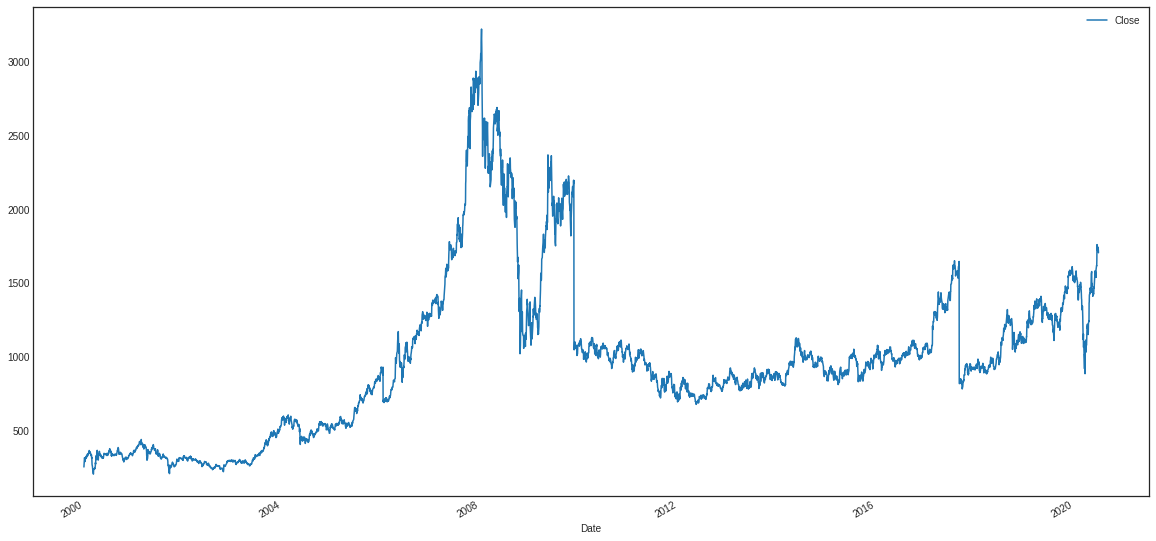

In [22]:
reliance_stationarity=reliance_analysis[['Close']]

reliance_stationarity.plot()

From the plotted graph we can say that the data doesn't have a constant average as there are meany leaps and troughs and also the variance is also different at different stages of the data. So our data is not stationary. We can also mathematically test for stationarity with adfuller test

## Augmented Dickey Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [23]:
test_result=adfuller(reliance_stationarity['Close'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(reliance_stationarity['Close'])

ADF Test Statistic : -2.02716964864068
p-value : 0.2747886586669628
#Lags Used : 20
Number of Observations Used : 5076
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since our p value is greater than 0.05 we need to accept the null hypothesis which states that our data is non-stationary

## Stationarity Conversion with shift()
Now let's convert our non-stationary data to stationary with shift() method. Here we take a shift() of 1 day which means all the records will step down to one step and we take the difference from the original data. Since we see a trend in our data, when we subtract today's value from yesterday's value considering a trend it will leave a constant value on its way thus making the plot stationary.

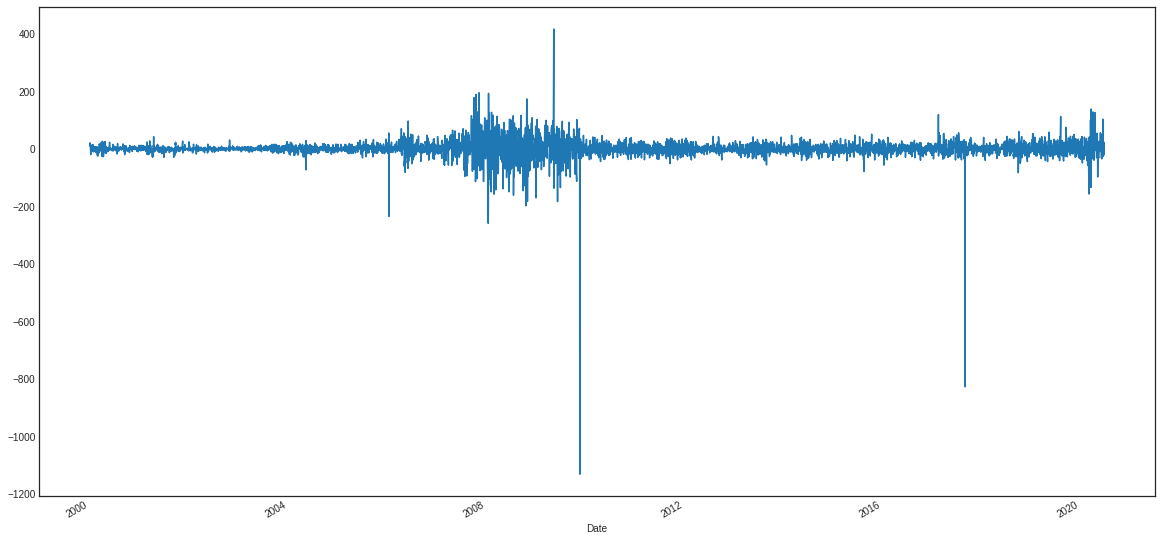

In [24]:
reliance_stationarity['Close First Difference']=reliance_stationarity['Close']-reliance_stationarity['Close'].shift(1)
reliance_stationarity['Close First Difference'].plot()

<a id="section-five"></a>
# Model building Phase- Forecasting & Prediction
Here we arrive at the most important phase why this project is being built.The forecasting and prediction phase.Many might wonder whether both terms are same or different. It is different. Here are few points to justify the statement.

* **Prediction** is concerned with estimating the outcomes for unseen data. For this purpose, you fit a model to a training data set, which results in an estimator f^(x) that can make predictions for new samples x.

* **Forecasting** is a sub-discipline of prediction in which we are making predictions about the future, on the basis of time-series data. Thus, the only difference between prediction and forecasting is that we consider the temporal dimension.

For model building we are considering the Close price feature. As it is very reliable for prediction and VWAP is a derived/calculated value which doesn't make much sense while getting forecasted value.

## AUTO ARIMA-Autoregressive Integrated Moving Average

### What is ARIMA ?
<img src="https://datapenchant.com/wp-content/uploads/2019/09/AR-COVER.png">
ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. <br>

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. <br>

An ARIMA model is characterized by 3 terms: p, d, q <br>

where, <br>

* p is the order of the AR term
* q is the order of the MA term
* d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.

### Why AUTO ARIMA ?
Although ARIMA is a very powerful model for forecasting time series data, the data preparation and parameter tuning processes end up being really time consuming. Before implementing ARIMA, you need to make the series stationary, and determine the values of p and q using the plots we discussed above. Auto ARIMA makes this task really simple for us as it eliminates steps like converting stationarity and getting values of p,q from acf anf pacf plots.

<div class="alert alert-block alert-info">  
The following explanation about acf and pacf is for study purposes. It is not used in our models as we are using auto arima where p,q are figured out by the model by selecting the best AIC
</div>
<br>

## ACF AND PACF PLOTS

**ACF** is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values.

**PACF** is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

## Moving Average Intuition
Consider a time series that was generated by a moving average (MA) process with a lag of k.Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

## Summary
From the autocorrelation plot we can tell whether or not we need to add MA terms. From the partial autocorrelation plot we know we need to add AR terms and here we plot the acf and pacf plots and select the p,q point where the correlation line first hits the error/zero band

## Building AUTO ARIMA model

For building the auto arima model,first let's split our training and testing data. For time series analysis we step back from using train test split as our data involves time and splitting can cause the mix of date across both train and test dataset which is vulnerable for a data leakage. So we split based on the dates. Here we split the training and validation data based on the year 2019 where the data before 2019 is training data and data after 2019 is validation data

In [25]:
train = reliance_lag[reliance_lag.Date < "2019"]
valid = reliance_lag[reliance_lag.Date >= "2019"]

In [26]:
exogenous_features = ['High_mean_lag3','High_mean_lag7', 'High_mean_lag30', 'High_std_lag3', 'High_std_lag7',
       'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30',
       'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Volume_mean_lag3',
       'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3',
       'Volume_std_lag7', 'Volume_std_lag30', 'VWAP_mean_lag3',
       'VWAP_mean_lag7', 'VWAP_mean_lag30', 'VWAP_std_lag3', 'VWAP_std_lag7',
       'VWAP_std_lag30','Month', 'Week', 'Day', 'Day of week']

### Training and prediction
Let's train our model with auto arima. Here the model selects the parameter p,q,d value in a normal arima model by itself by determining AIC value ( Akaike information criterion ) .AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model. So AUTO ARIMA prefers the parameters which can reap less information loss

In [27]:
model = auto_arima(train.Close, exogenous=train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(train.Close, exogenous=train[exogenous_features])

valid["Forecast_ARIMAX"] = model.predict(n_periods=len(valid), exogenous=valid[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=47651.514, Time=47.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48784.964, Time=36.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47791.257, Time=21.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47895.930, Time=27.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84069.284, Time=8.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=47747.609, Time=31.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=52602.406, Time=34.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=47651.657, Time=46.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=47650.027, Time=32.80 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=47712.048, Time=44.58 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=47652.131, Time=34.08 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=47652.023, Time=37.85 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=47668.561, Time=57.42 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=47653.687, Time=47.57 sec
 ARIMA

From the autoarima results we got the values of p and q as 2,3 respectively and the AIC score is 47648.135

### Plotting the forecasted values with the actual data
Let's plot the results and compare them with actual values

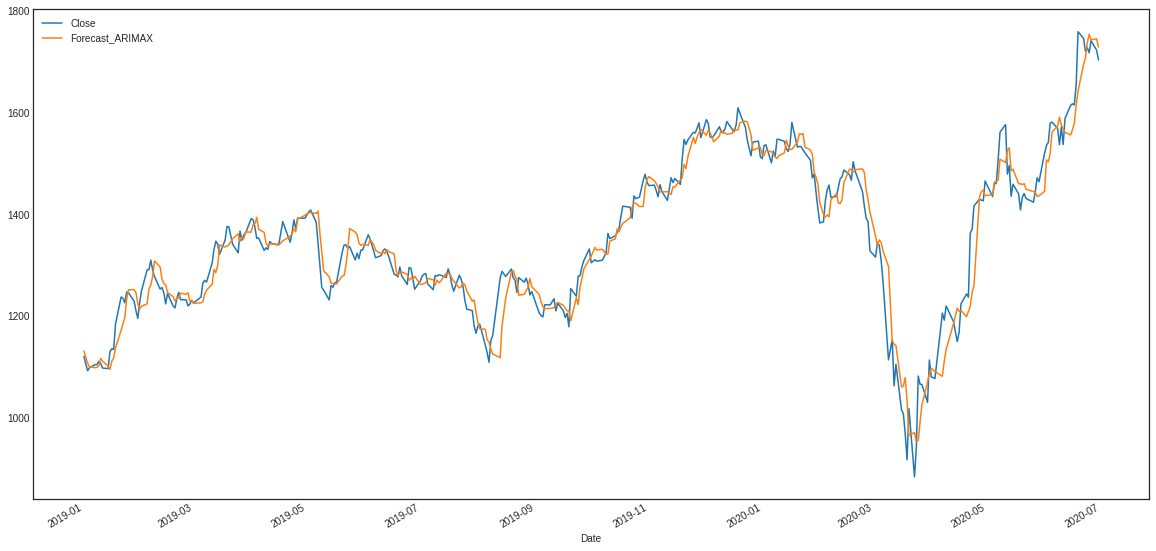

In [28]:
valid[["Close", "Forecast_ARIMAX"]].plot()

Fantastic we have got more or less a similar result. Our model has captured a good amount of information from training dataset. Let's look at the performance metrics

### Performance metrics-RMSE and MAE
Here we calculate how well our model performed with numbers with the help of RMSE and MAE. We hope that the erroe will be very low

In [29]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(valid.Close, valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(valid.Close, valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 37.78710646535872

MAE of Auto ARIMAX: 26.996219309135284


We got the RMSE and MAE score of 37 and 26 which is pretty much good score considering a time series data. AUTOARIMA does it again !

## Fb Prophet

<img src="https://www.kdnuggets.com/wp-content/uploads/prophet-facebook.jpg">
Facebook developed an open sourcing Prophet, a forecasting tool available in both Python and R. It provides intuitive parameters which are easy to tune. Even someone who lacks deep expertise in time-series forecasting models can use this to generate meaningful predictions for a variety of problems in business scenarios.



<div class="alert alert-block alert-info">  
<b>IMPORTANT NOTE:</b> The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast. Also in fb prophet we are using the cleaned data not the stationary converted data as prophet takes care of stationarity internally.   
</div>
<br>

In [30]:
### intiialize the Model
model=Prophet()

#Fitting the model and renaming the columns based on prophe requirements
model.fit(reliance_analysis[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

#Making future dataframe for forecasting, we have given 365 days which can calculate VWAP till 2021
reliance_future=model.make_future_dataframe(periods=365)

#Checking the future dates
reliance_future.tail()

ds
5457 2021-06-26
5458 2021-06-27
5459 2021-06-28
5460 2021-06-29
5461 2021-06-30

We have created the future dataframe for 365 days which you can see above, we have dates till 2021 and now we are going to predict the stock prices for that 

### Prediction of future values

In [31]:
### Prediction of future values
reliance_prediction=model.predict(reliance_future)

reliance_prediction.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
5457 2021-06-26  1474.654705  1222.409122  1835.685380  1295.143376   
5458 2021-06-27  1474.900907  1235.459114  1844.433854  1294.067359   
5459 2021-06-28  1475.147108  1173.788742  1769.317140  1292.943121   
5460 2021-06-29  1475.393310  1180.577802  1776.940308  1291.759554   
5461 2021-06-30  1475.639511  1155.469468  1777.539087  1290.472820   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
5457  1652.019984       38.878575             38.878575             38.878575   
5458  1654.641825       59.506388             59.506388             59.506388   
5459  1656.538553        2.150123              2.150123              2.150123   
5460  1657.672208        3.774494              3.774494              3.774494   
5461  1658.773646        4.577207              4.577207              4.577207   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
5457  18.596780     18.596780     18.596780  20.281794     20.281794   
5458  40.775366     40.775366     40.775366  18.731022     18.731022   
5459 -15.072235    -15.072235    -15.072235  17.222359     17.222359   
5460 -12.012188    -12.012188    -12.012188  15.786682     15.786682   
5461  -9.876670     -9.876670     -9.876670  14.453877     14.453877   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
5457     20.281794                   0.0                         0.0   
5458     18.731022                   0.0                         0.0   
5459     17.222359                   0.0                         0.0   
5460     15.786682                   0.0                         0.0   
5461     14.453877                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
5457                         0.0  1513.533280  
5458                         0.0  1534.407295  
5459                         0.0  1477.297232  
5460                         0.0  1479.167804  
5461                         0.0  1480.216718

We have predicted the values for all the dates and even the 2021 dates. yhat is the predicted values,yhat lower and upper is the band/range of that predicted values can be deflected. Let's look at the plot to get a better understanding.

### Forecast Plot

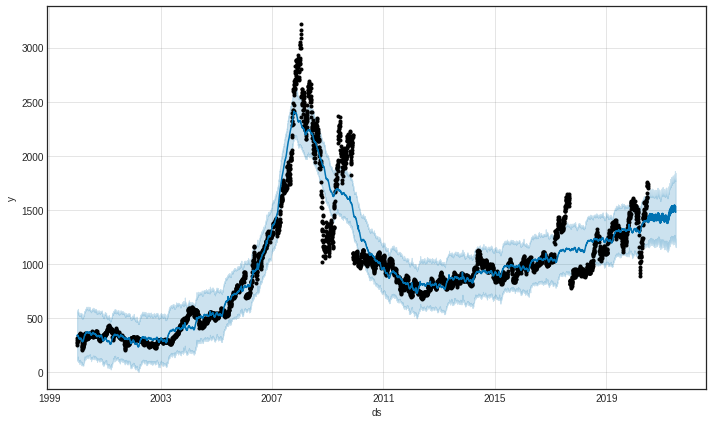

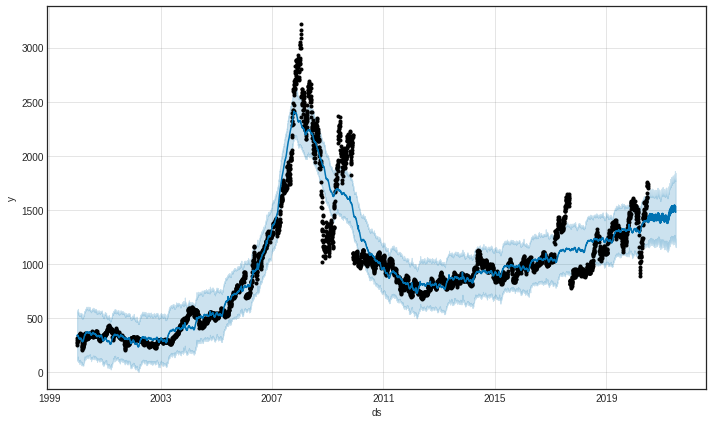

In [32]:
#Forecast plot
model.plot(reliance_prediction)

From the plot we can see the predicted values in blue line which follows most the actual trend and after 2020 we can see th blue line getting extended for the 2021 which is the future prices and we can be assured that the upward trend continues in 2021. If Reliance gets a big deal in 5G, their stock prices will be over the roof.

### Forecast Components

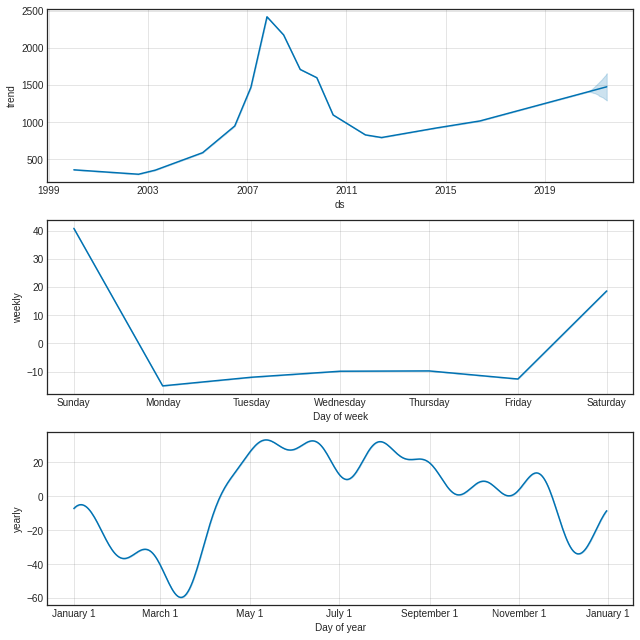

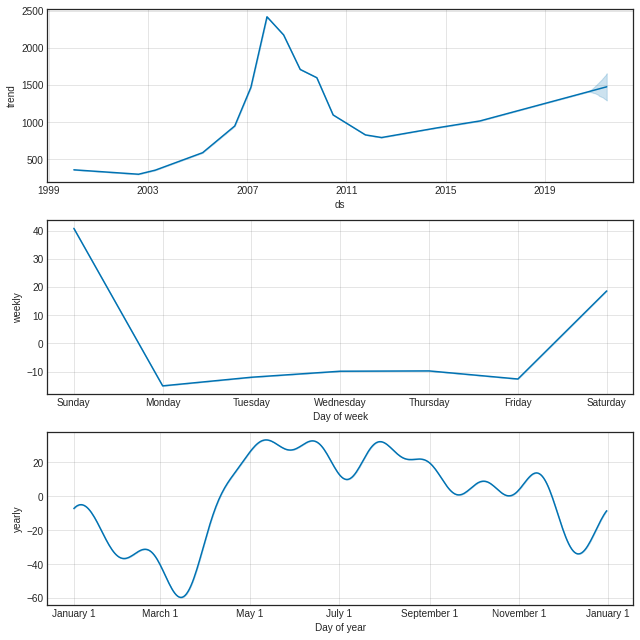

In [33]:
#Forecast components
model.plot_components(reliance_prediction)

From the model compenents of prophet we get the trend,weekly and yearly plots. We can see the stocks were up during the months of March-January 

### Cross validation in prophet
Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. This figure illustrates a simulated historical forecast on the Peyton Manning dataset, where the model was fit to a initial history of 5 years, and a forecast was made on a one year horizon.

<img src="https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png">

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.
<div class="alert alert-block alert-info">  
Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 1095 days of training data in the first cutoff and then making predictions every 180 days.  
</div>
<br>
 

In [34]:
#Cross validation for the parameter days
reliance_cv=cross_validation(model,initial='1095 days',period='180 days',horizon="365 days")

### Performance metric

Here we check the performance of our model with root mean squared value and plot it

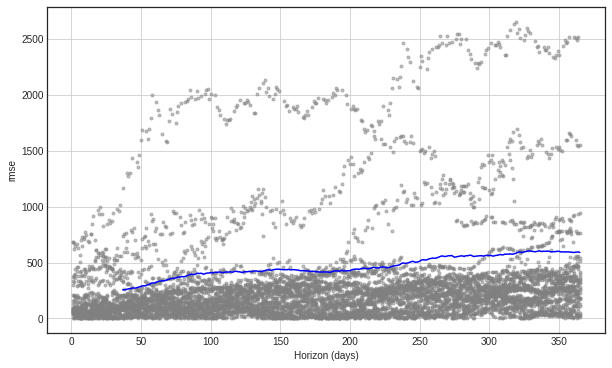

In [35]:
#Checking the parameters
reliance_performance=performance_metrics(reliance_cv)
reliance_performance.head()


#Plotting for root mean squared metric
fig=plot_cross_validation_metric(reliance_cv,metric='rmse')

From the results we can understand the rmse value lies between 0-500 which is not great and not terrible considering the stock prediction as it is very uncertain to the the right value of prediction